# **Mileage prediction**

-------------

## **Objective**

The objective of this project is to develop a machine learning model capable of predicting the mileage (kmpl) of vehicles based on key engine and performance parameters such as displacement, horsepower, weight, and acceleration. By leveraging both linear and polynomial regression techniques, this project aims to identify the relationships between these variables and optimize the prediction accuracy. The model is designed to assist automotive industries or consumers in estimating vehicle efficiency by analyzing the underlying mechanical factors.

## **Data Source**

**Source**:

This dataset was Provided by YBI Foundation through the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**Data Set Information**:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute 'mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)
Attribute Information:

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

## **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [ ]:
mp = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/refs/heads/main/MPG.csv')

## **Describe Data**

In [ ]:
mp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mp.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
mp.info()
mp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


(398, 9)

In [ ]:
mp.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


## **Data Preprocessing**

In [ ]:
mp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mp.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
num_mp = mp.select_dtypes(include=['number'])  # Selects only numeric columns
num_mp.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [ ]:
#Convwerting mpg to kmpl
mp['mpg'] = mp['mpg'] * 0.425143707
mp['mpg'] = mp['mpg'].round(2)
mp.rename(columns={'mpg':'kmpl'},inplace=True)
mp.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,1.38,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1.15,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,1.38,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,1.23,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,1.31,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mp = mp.dropna()
mp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kmpl          392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## **Data Visualization**

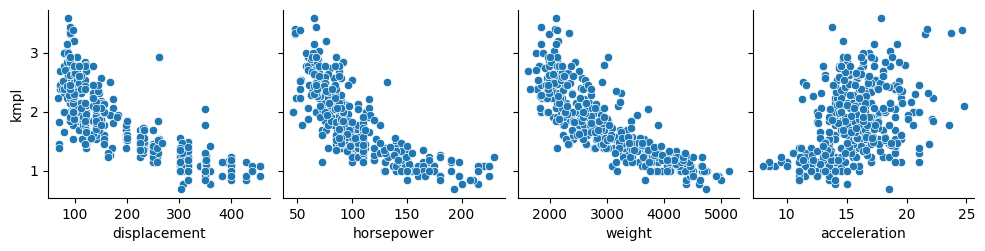

In [ ]:
sns.pairplot(mp,x_vars=['displacement','horsepower','weight','acceleration'],y_vars=['kmpl'])

<Axes: xlabel='displacement', ylabel='kmpl'>

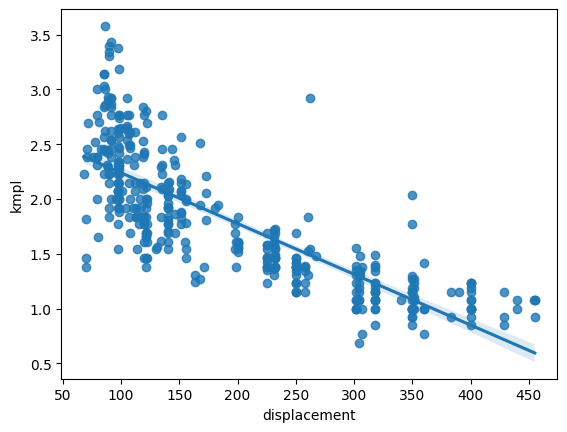

In [ ]:
sns.regplot(x='displacement',y='kmpl',data=mp)

## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
mp.columns
#'Y' the dependent variable for this regressioon analisis is kmpl and the independent variables for this are displacement, horsepower, weight and acceleration.

Index(['kmpl', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = mp['kmpl']
x = mp[['displacement','horsepower','weight','acceleration']]
print(x.shape,y.shape)

(392, 4) (392,)


#**Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


to ensure that your features have a mean of 0 and a standard deviation of 1

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

## **Linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

1.804757286167756

In [ ]:
lr.coef_

array([-0.08197635, -0.12897495, -0.31524647, -0.00859417])

Mileage = 1.8-0.081*Displacemet - 0.128*Horsepower - 0.315*Weight - 0.008Acceleration + error

## **Prediction**

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([1.42306866, 1.15987633, 1.09915459, 1.8197931 , 2.28633128,
       1.8201413 , 2.04517377, 1.8875715 , 1.15739786, 0.91815844,
       1.85112908, 2.14848569, 2.43219479, 2.38284902, 1.40847912,
       1.48546588, 2.15829255, 2.4699968 , 2.39380547, 2.08679063,
       1.4462111 , 1.73227699, 2.00941057, 2.48646645, 1.59414635,
       0.67537472, 1.70621441, 1.39887067, 1.92148013, 1.17296501,
       1.77748102, 1.31444677, 0.76058078, 2.30560736, 1.56864509,
       2.23727921, 1.87792677, 1.66954315, 0.80806294, 1.00891353,
       1.64568803, 1.53354524, 0.476787  , 1.36699479, 1.73252919,
       2.25482219, 1.03690466, 1.98933658, 2.25955316, 1.72269888,
       1.6959822 , 1.26525584, 1.84904525, 2.31484651, 0.77751755,
       0.75792732, 2.1572508 , 1.79860913, 1.54345891, 2.3573094 ,
       1.60764492, 2.05812851, 1.75967427, 1.08830471, 1.89436557,
       2.07143791, 1.17239521, 1.85278838, 2.36743945, 1.15130923,
       2.12711451, 1.86203771, 0.83996226, 2.32247139, 2.37305

## **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

0.25608621327220926

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14734639765737112

In [ ]:
r2_score(y_test,y_pred)

0.70209004533317

## **Polynomial regression model**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only= True, include_bias= False)

In [ ]:
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

In [ ]:
lr.fit(x_train2,y_train)

LinearRegression()

In [ ]:
lr.intercept_MB

1.6341652498707189

In [ ]:
lr.coef_

array([-0.21332861, -0.38506144, -0.10383925, -0.06231694,  0.09642066,
       -0.01015658, -0.07039795,  0.10454387, -0.0131788 ,  0.11000649])

In [ ]:
y_pred_poly = lr.predict(x_test2)

In [ ]:
y_pred_poly

array([1.18647677, 1.07658961, 1.06073312, 1.99657246, 2.3745546 ,
       1.74288469, 1.90156675, 1.74422767, 1.1039242 , 1.01478148,
       2.11646348, 2.1853597 , 2.66172419, 2.55661542, 1.41996427,
       1.36434612, 2.11156375, 2.65857138, 2.57323977, 2.05936384,
       1.29053973, 1.61746526, 1.86928378, 2.67200429, 1.45830184,
       1.17158822, 1.48766972, 1.23285258, 1.97898867, 1.20728371,
       1.61936451, 1.16480183, 1.08319759, 2.42596961, 1.46168781,
       2.32504606, 1.70560702, 1.60713338, 0.99578775, 1.03144906,
       1.51000537, 1.33692642, 1.14912257, 1.22621891, 1.62117427,
       2.3631836 , 1.01204286, 1.93424704, 2.14395525, 1.52654597,
       1.60557093, 1.08215625, 1.77635701, 2.4477058 , 0.9870523 ,
       1.07488705, 2.12736678, 1.60144569, 1.34666623, 2.51444781,
       1.50983996, 1.95460831, 1.66204449, 1.05233897, 1.67231762,
       1.95589393, 1.08509314, 1.75709511, 2.45106164, 1.08161596,
       1.9973777 , 1.64649525, 0.99592575, 2.50625739, 2.49048

## **Model Evaluation**

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

0.2147010482748449

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12106960447771166

In [ ]:
r2_score(y_test,y_pred_poly)

0.7453051100682785

## **Result**

## Results
The performance of the linear and polynomial regression models was evaluated using several key metrics:

- **Linear Regression**:
  - Mean Absolute Error (MAE): 0.2561
  - Mean Absolute Percentage Error (MAPE): 14.73%
  - R² Score: 0.7021

- **Polynomial Regression**:
  - Mean Absolute Error (MAE): 0.2147
  - Mean Absolute Percentage Error (MAPE): 12.11%
  - R² Score: 0.7453

The polynomial regression model outperformed the linear regression model across all metrics, with lower errors and a higher R² score, indicating that it better captured the non-linear relationships between the predictors and mileage.


## **Explaination**

For this project, the dataset was first loaded and pre-processed using Python's popular libraries such as numpy and pandas for handling numerical data and data frames. Visualizations were created using matplotlib and seaborn to explore the relationship between the target variable (kmpl) and predictors (displacement, horsepower, weight, and acceleration). To prepare the data for modeling, StandardScaler was applied to standardize the features. The dataset was then split into training and testing sets using train_test_split. Two models were built: one using LinearRegression and the other with PolynomialFeatures to capture non-linear relationships. The results were compared to evaluate which model provided better predictions for vehicle mileage based on the selected parameters.